Adam Ten Hoeve, Jared Pino, Joseph Plata  
COMP 4431 - Data Mining  
Assignment 3

In [56]:
# Load Necesary packages
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline

We want to determine if we can distinguish between the three speicies of iris found in SKLearn's iris dataset. To do this, we can look at different visualizations of the data to get a better idea of what features would result in the best classifications.

To begin, we need to load in the data and take an exploratory look at its values.

In [42]:
# Load the iris dataset
iris = datasets.load_iris()
# Look at the available information about the dataset.
print(iris["DESCR"])
# Store the data as a dataframe.
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["species"] = iris["target"]

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [43]:
# And let's take a numerical look at our variables
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [45]:
df["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

From the numerical analysis, we can see that there are no null, missing or strange values. Also, there are equal amounts of each class. That knowledge is great, it means less data cleaning for us. Let's visualize the spreads and interactions between these features. In particular, we want to look at how the feature values differ for the different species, so we should make sure that each plot distinguishes between the species.

Let's start with some histograms of each feature. The histograms will provide us with an idea for whether there is a difference between distributions of each feature, between species.

Text(0.5, 1.0, 'species sepal length')

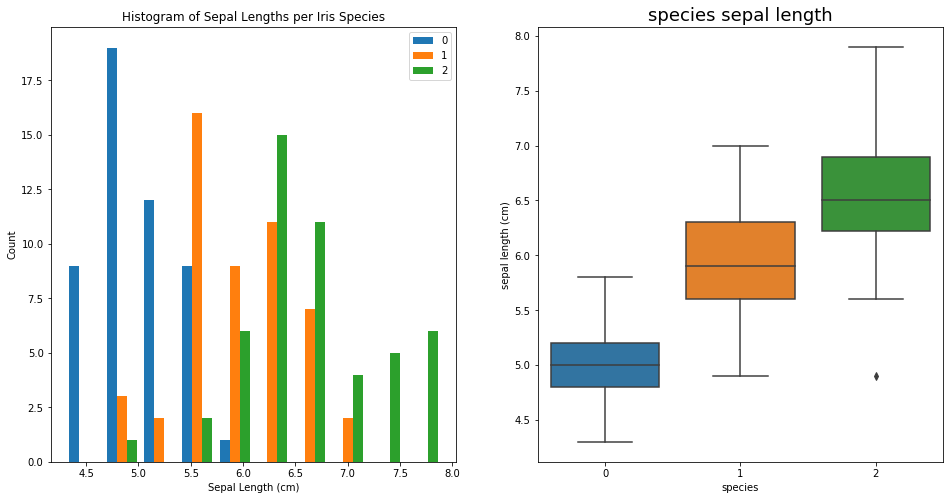

In [82]:
# Histogram and boxplot of sepal length per class

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

x1 = list(df.loc[df["species"]==0]["sepal length (cm)"])
x2 = list(df.loc[df["species"]==1]["sepal length (cm)"])
x3 = list(df.loc[df["species"]==2]["sepal length (cm)"])

ax[0].hist([x1, x2, x3], label=["0","1","2"])
ax[0].set_title("Histogram of Sepal Lengths per Iris Species")
ax[0].set_xlabel("Sepal Length (cm)")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.boxplot(x = "species", y = "sepal length (cm)", data = df, ax=ax[1])
plt.title("species sepal length", size=18)

Text(0.5, 1.0, 'Boxplots of Sepal Width Per Species')

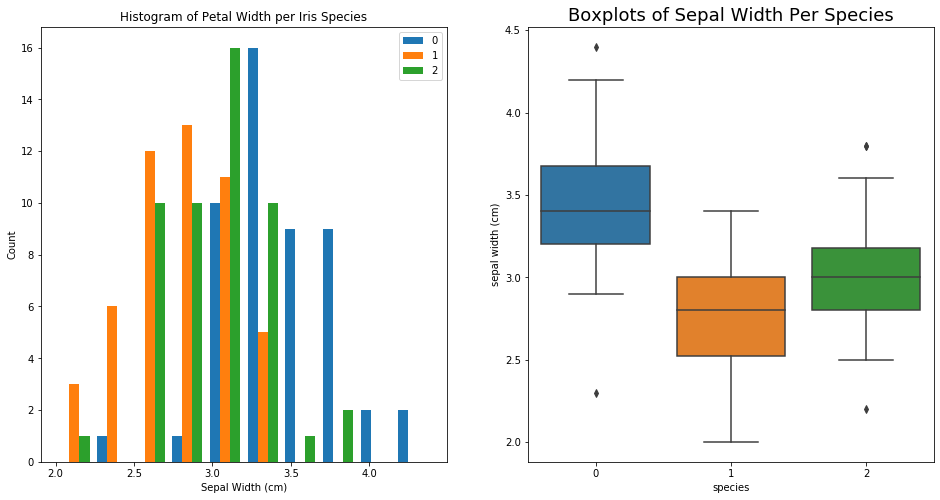

In [84]:
# Histogram and boxplot of Sepal width per class
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

x1 = list(df.loc[df["species"]==0]["sepal width (cm)"])
x2 = list(df.loc[df["species"]==1]["sepal width (cm)"])
x3 = list(df.loc[df["species"]==2]["sepal width (cm)"])

ax[0].hist([x1, x2, x3], label=["0","1","2"])
ax[0].set_title("Histogram of Sepal Width per Iris Species")
ax[0].set_xlabel("Sepal Width (cm)")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.boxplot(x = "species", y = "sepal width (cm)", data = df, ax=ax[1])
plt.title("Boxplots of Sepal Width Per Species", size=18)

Text(0.5, 1.0, 'Boxplots of Petal Length Per Species')

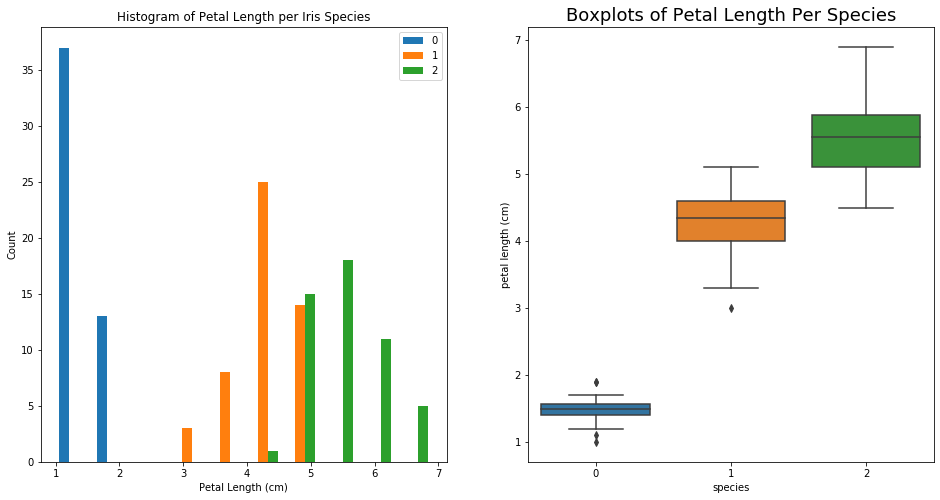

In [85]:
# Histogram and boxplot of petal lengths
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

x1 = list(df.loc[df["species"]==0]["petal length (cm)"])
x2 = list(df.loc[df["species"]==1]["petal length (cm)"])
x3 = list(df.loc[df["species"]==2]["petal length (cm)"])

ax[0].hist([x1, x2, x3], label=["0","1","2"])
ax[0].set_title("Histogram of Petal Length per Iris Species")
ax[0].set_xlabel("Petal Length (cm)")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.boxplot(x = "species", y = "petal length (cm)", data = df, ax=ax[1])
plt.title("Boxplots of Petal Length Per Species", size=18)

Text(0.5, 1.0, 'Boxplots of Petal Width Per Species')

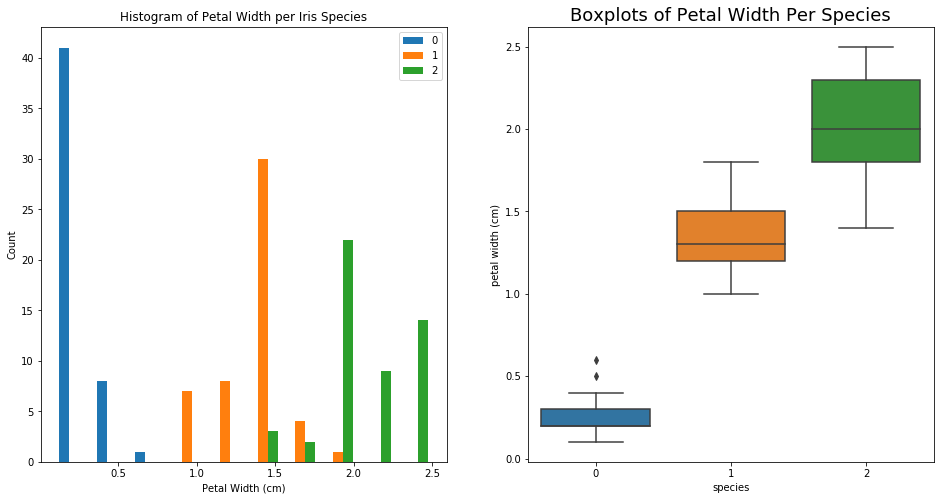

In [86]:
# Histogram and boxplots of petal widths
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

x1 = list(df.loc[df["species"]==0]["petal width (cm)"])
x2 = list(df.loc[df["species"]==1]["petal width (cm)"])
x3 = list(df.loc[df["species"]==2]["petal width (cm)"])

ax[0].hist([x1, x2, x3], label=["0","1","2"])
ax[0].set_title("Histogram of Petal Width per Iris Species")
ax[0].set_xlabel("Petal Width (cm)")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.boxplot(x = "species", y = "petal width (cm)", data = df, ax=ax[1])
plt.title("Boxplots of Petal Width Per Species", size=18)

From these plots, we can see that there is a big difference between the values of species 0 from species 1 and 2. Species 1 and 2 have more similar feature values, so it might be harder to distinguish between those two than from species 0. We can also see that there is greater difference between species when comparing their petals than when comparing their sepals. To classify between the species, it will probably be better to focus on the different leaf values. Let's make some PDF's and CDF's for the petal values of each species. This might give us a better understanding of the feature distributions for each speicies.

In [103]:
# Define a function to return the PDF and CDF for a specific species
def get_pdf_cdf(data, species, feature):
    df_species = df.loc[df["species"]==species]
    count, bins_count = np.histogram(df_species[feature], bins=10)
    pdf = count / np.sum(count)
    cdf = np.cumsum(pdf)
    return pdf, cdf, bins_count

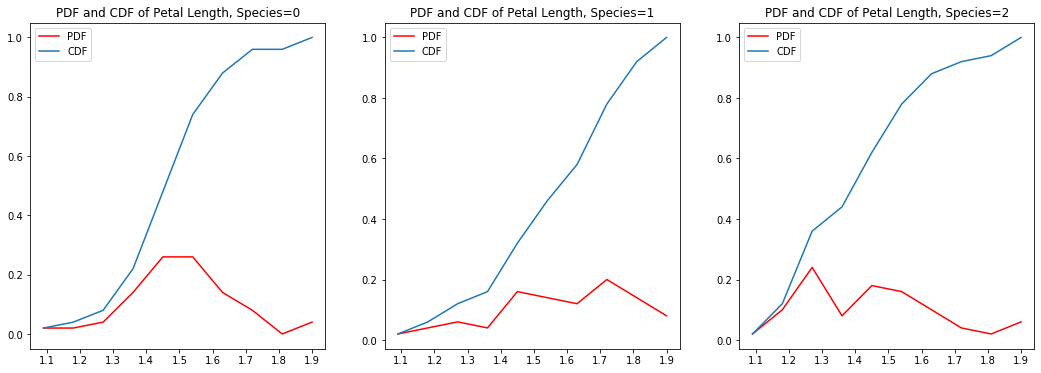

In [104]:
# Plot the PDF and CDF of Petal Lengths
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

pdf_petal_length_0, cdf_petal_length_0, bins_0 = get_pdf_cdf(df, 0, "petal length (cm)")
pdf_petal_length_1, cdf_petal_length_1, bins_1 = get_pdf_cdf(df, 1, "petal length (cm)")
pdf_petal_length_2, cdf_petal_length_2, bins_2 = get_pdf_cdf(df, 2, "petal length (cm)")

ax[0].plot(bins_0[1:], pdf_petal_length_0, color="red", label="PDF")
ax[0].plot(bins_0[1:], cdf_petal_length_0, label="CDF")
ax[0].set_title("PDF and CDF of Petal Length, Species=0")
ax[0].legend()

ax[1].plot(bins_0[1:], pdf_petal_length_1, color="red", label="PDF")
ax[1].plot(bins_0[1:], cdf_petal_length_1, label="CDF")
ax[1].set_title("PDF and CDF of Petal Length, Species=1")
ax[1].legend()

ax[2].plot(bins_0[1:], pdf_petal_length_2, color="red", label="PDF")
ax[2].plot(bins_0[1:], cdf_petal_length_2, label="CDF")
ax[2].set_title("PDF and CDF of Petal Length, Species=2")
ax[2].legend()

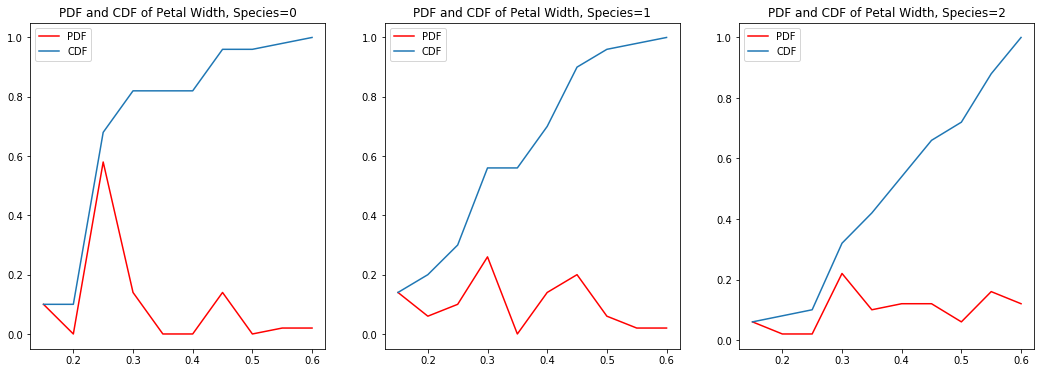

In [105]:
# Plot the PDF and CDF of Petal Widths
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

pdf_petal_width_0, cdf_petal_width_0, bins_0 = get_pdf_cdf(df, 0, "petal width (cm)")
pdf_petal_width_1, cdf_petal_width_1, bins_1 = get_pdf_cdf(df, 1, "petal width (cm)")
pdf_petal_width_2, cdf_petal_width_2, bins_2 = get_pdf_cdf(df, 2, "petal width (cm)")

ax[0].plot(bins_0[1:], pdf_petal_width_0, color="red", label="PDF")
ax[0].plot(bins_0[1:], cdf_petal_width_0, label="CDF")
ax[0].set_title("PDF and CDF of Petal Width, Species=0")
ax[0].legend()

ax[1].plot(bins_0[1:], pdf_petal_width_1, color="red", label="PDF")
ax[1].plot(bins_0[1:], cdf_petal_width_1, label="CDF")
ax[1].set_title("PDF and CDF of Petal Width, Species=1")
ax[1].legend()

ax[2].plot(bins_0[1:], pdf_petal_width_2, color="red", label="PDF")
ax[2].plot(bins_0[1:], cdf_petal_width_2, label="CDF")
ax[2].set_title("PDF and CDF of Petal Width, Species=2")
ax[2].legend()

Now, let's make some scatterplots of the values to see how they relate to each other.

Text(0.5, 1.0, 'Sepal Width vs. Sepal Length')

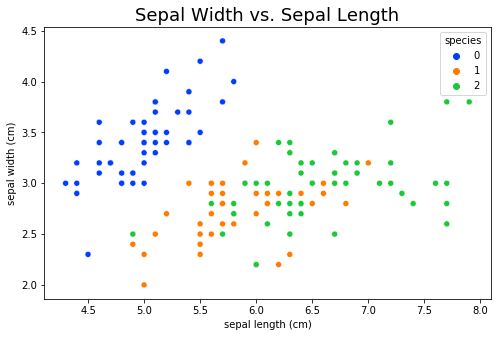

In [50]:
# Scatterplot of Sepal Width vs Sepal Length
sns.scatterplot(x = "sepal length (cm)", y = "sepal width (cm)", hue = "species", palette = "bright", data = df)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.title("Sepal Width vs. Sepal Length", size=18)

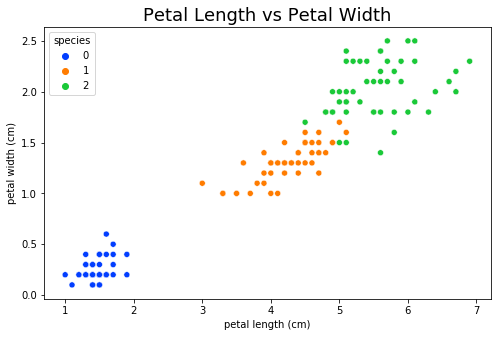

In [51]:
sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = "species", palette = "bright", data = df)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.title("Petal Length vs Petal Width", size=18)
plt.show()

Text(0.5, 0, 'Sepal Length')

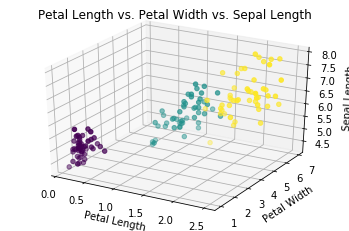

In [77]:
# 3d Scatterplot of Petal Length vs Petal Width vs Sepal Length
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(xs=df["petal width (cm)"], 
           ys=df["petal length (cm)"], 
           zs=df["sepal length (cm)"],
           c=df["species"])
ax.set_title("Petal Length vs. Petal Width vs. Sepal Length")
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_zlabel("Sepal Length")

From the plots, we can see that species 0 has sepal and petal measurements that are distinct from species 1 and 2. Species 1 and 2 are closer, especially when comparing sepals, but there is a reasonable distinction between the groups when comparing petals.

We can see the difference with the two values, and maybe that difference will be amplified if we look at the area of the petals and sepals of each species. Let's do some feature engineering to add area to our dataframe.

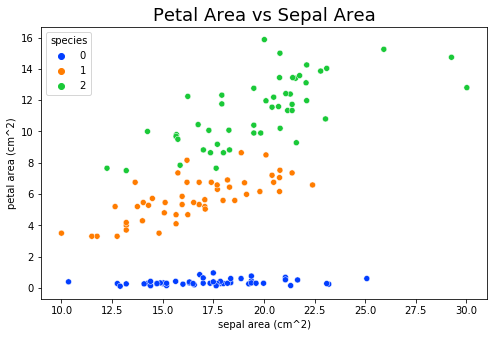

In [55]:
df['sepal area (cm^2)'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']
df['total area (cm^2)'] = df['petal area (cm^2)'] * df['sepal area (cm^2)']

#  Create a scatterplot of Petal Area and Sepal Area
sns.scatterplot(x = "sepal area (cm^2)", y = "petal area (cm^2)", hue = "species", palette = "bright", data = df)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.title("Petal Area vs Sepal Area", size=18)
plt.show()

The distinction between areas confirms our earlier conclusions. We were nearly able to seperate species 1 and 2, but there is still some overlap. We really want to see if there is a clear way to distinguish those two species. And we can look at all the relations between features with some pair plots.

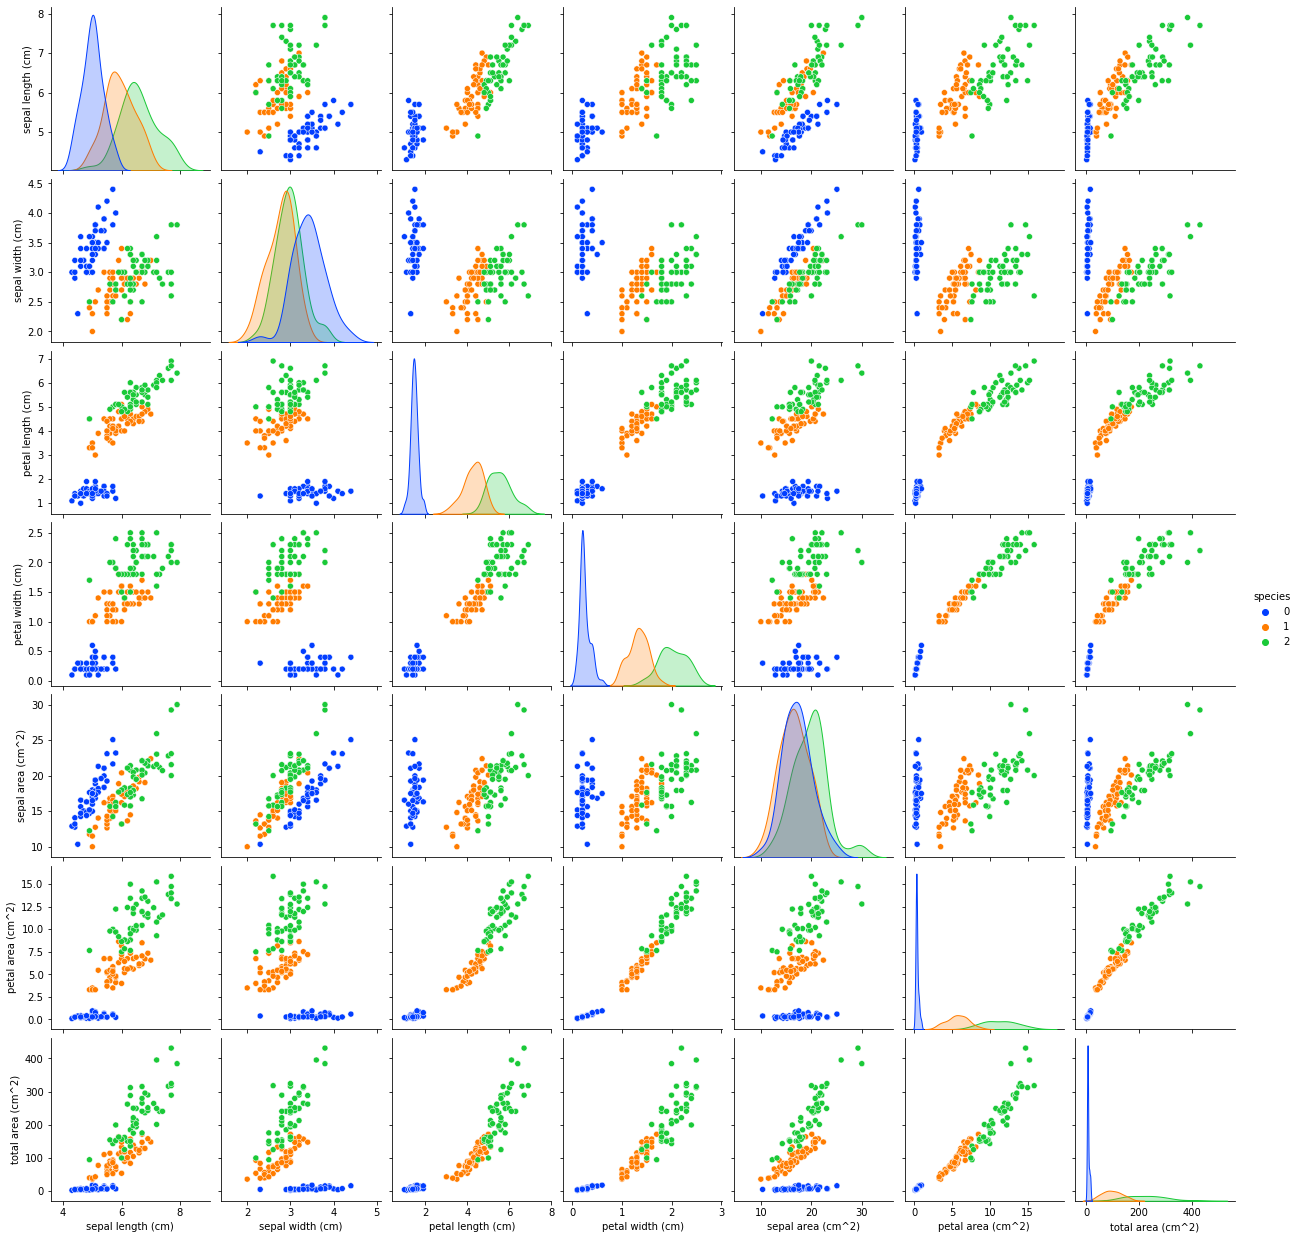

In [66]:
sns.pairplot(data=df, hue="species", palette="bright")

None of these plots show a clear, uncrossed seperation between species 1 and 2. That is a shame, but not the end of the world. From this point, we have a pretty good idea that the petal length and width are the most important features for identifying the different iris species.

We can also look at the correlations between

Calculate the dot product between the sepal length vector vs the sepal width vector.

In [107]:
dot_product = df['sepal length (cm)'].dot(df['sepal width (cm)'])
dot_product

2673.43

Calculate the L2 norm of the sepal length vectors

In [110]:
sepal_length_norm = np.linalg.norm(df['sepal length (cm)'], 2)
sepal_length_norm

72.27620631992247

Calculate the distance between the sepal length vector and the sepal width vector

In [113]:
dist = (np.linalg.norm(df['sepal length (cm)']-df['sepal width (cm)']))
dist

36.1578483873142